In [2]:
def load_hap(hap_vcf):
    gz_flag = False
    if hap_vcf.endswith(".gz"):
        import gzip
        gz_flag = True
        f = gzip.open(hap_vcf, 'rb')
    else:
        f = open(hap_vcf, 'r')
    tp_cnt, fp_cnt, fn_cnt = 0, 0, 0
    tp_snps = set()
    fp_snps = set()
    fn_snps = set()
    with f:
        for line_str in f:
            if gz_flag:
                line_str = line_str.decode('utf-8')
            if line_str.startswith('#'):
                continue
            else:
                line = line_str.strip().split('\t')
                ref = line[3]
                alt = line[4]
                truth = line[9]
                query = line[10]
                if "TP" in truth and "SNP" in truth and "TP" in query:
                    tp_cnt += 1
                    tp_snps.add("{}:{}".format(line[0], line[1]))
                else:
                    ## An error genotype will both increase a FP and a FN
                    if "FN" in truth and "SNP" in truth:
                        fn_cnt += 1
                        fn_snps.add("{}:{}".format(line[0], line[1]))
                    if "FP" in query and "SNP" in query:
                        fp_cnt += 1
                        fp_snps.add("{}:{}".format(line[0], line[1]))
    return tp_snps, fp_snps, fn_snps

In [3]:
def output_select_vcf(selected_vcf_set,input_vcf_file,output_vcf_file):
    """ output subset of vcf records covering selected_vcf_set """
    fout = open(output_vcf_file,'w')
    with open(input_vcf_file, 'r') as f:
        for line in f:
            if line.startswith('#'):
                fout.write(line)
            else:
                fields = line.strip().split("\t")
                if "{}:{}".format(fields[0],fields[1]) in selected_vcf_set:
                    fout.write(line)
    fout.close()

In [4]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

## wtc11-hifi data chromosome 19

In [2]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/hap/ours.10x.chr19.vcf"
clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/hap/clair3.10x.chr19.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)

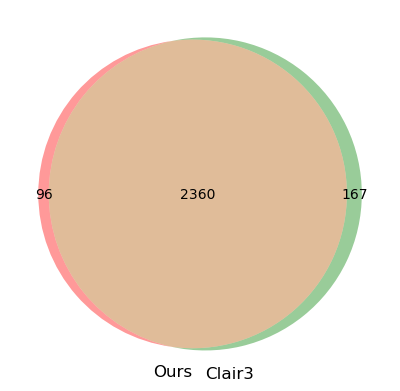

In [6]:
venn2([ours_tp, clair3_tp], set_labels = ('Ours', 'Clair3'));

{'chr19:44802191', 'chr19:34472079', 'chr19:36773432', 'chr19:21376609', 'chr19:36997579', 'chr19:21091672', 'chr19:42227611', 'chr19:52652421', 'chr19:12813786', 'chr19:49515453', 'chr19:36315529', 'chr19:57607542', 'chr19:23827979', 'chr19:52703380', 'chr19:54178196', 'chr19:23827917', 'chr19:1854558', 'chr19:52652281', 'chr19:36317124', 'chr19:21185715', 'chr19:4653546', 'chr19:39520635', 'chr19:49668638', 'chr19:2341105', 'chr19:19680467', 'chr19:34470783', 'chr19:56379334', 'chr19:23104144', 'chr19:23216970', 'chr19:44802195', 'chr19:18365443', 'chr19:13773913', 'chr19:21187627', 'chr19:55389165', 'chr19:58259780', 'chr19:21291699', 'chr19:19680465', 'chr19:9524525', 'chr19:36997570', 'chr19:48924300', 'chr19:23216983', 'chr19:34471422', 'chr19:20950940', 'chr19:21091671', 'chr19:41872775', 'chr19:56379265', 'chr19:20623752', 'chr19:17935147', 'chr19:52888233', 'chr19:23216982', 'chr19:19856624', 'chr19:57843190', 'chr19:23742535', 'chr19:17103794', 'chr19:48287386', 'chr19:165504

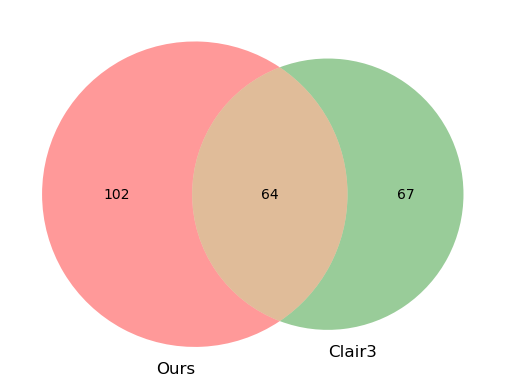

In [13]:
venn2([ours_fp, clair3_fp], set_labels = ('Ours', 'Clair3'));
print(ours_fp-clair3_fp)
output_select_vcf(ours_fp-clair3_fp, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/hap/ours_fp.vcf")

{'chr19:38840656', 'chr19:36773432', 'chr19:38399371', 'chr19:46471395', 'chr19:23740996', 'chr19:16078433', 'chr19:55662185', 'chr19:36157372', 'chr19:18559073', 'chr19:40804666', 'chr19:39980558', 'chr19:36157608', 'chr19:36157569', 'chr19:48139011', 'chr19:44002969', 'chr19:10656122', 'chr19:23827979', 'chr19:55537083', 'chr19:1854558', 'chr19:34354674', 'chr19:57472529', 'chr19:36317124', 'chr19:39475030', 'chr19:1011847', 'chr19:36950560', 'chr19:54190114', 'chr19:56378807', 'chr19:49107156', 'chr19:18364336', 'chr19:6413144', 'chr19:23834822', 'chr19:36157332', 'chr19:539266', 'chr19:539279', 'chr19:2271742', 'chr19:8513614', 'chr19:539817', 'chr19:36320741', 'chr19:2759109', 'chr19:40804704', 'chr19:19928158', 'chr19:1020674', 'chr19:41017111', 'chr19:41018227', 'chr19:1092517', 'chr19:57861683', 'chr19:12923352', 'chr19:18311554', 'chr19:539250', 'chr19:40806356', 'chr19:7977547', 'chr19:57472677', 'chr19:18364498', 'chr19:2811790', 'chr19:38714206', 'chr19:53243391', 'chr19:39

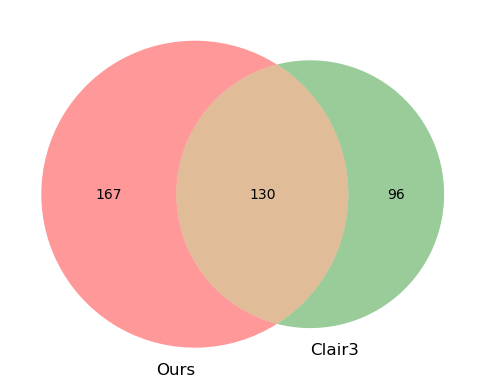

In [14]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
print(ours_fn-clair3_fn)
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/hap/ours_fn.vcf")

## wtc11-hifi data chromosome 19 (local test)

In [82]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/local_hap/strand_chr19_10x.hap.vcf"
clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/hap/clair3.10x.chr19.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)

Text(0.5, 1.0, 'TP sites')

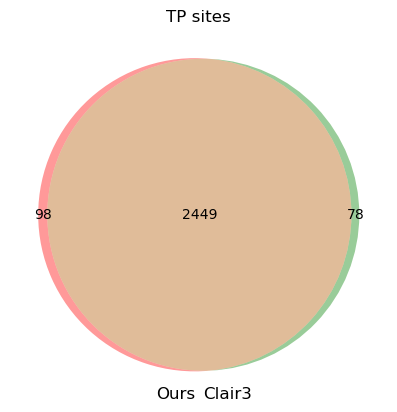

In [83]:
venn2([ours_tp, clair3_tp], set_labels = ('Ours', 'Clair3'));
plt.title("TP sites")

{'chr19:39473188', 'chr19:2790136', 'chr19:21291765', 'chr19:43998059', 'chr19:49528002', 'chr19:2790139', 'chr19:52888247', 'chr19:50384283', 'chr19:23216982', 'chr19:37184455', 'chr19:21185715', 'chr19:37542349', 'chr19:52888233', 'chr19:16855610', 'chr19:36997570', 'chr19:21091672', 'chr19:21091671', 'chr19:21034542', 'chr19:36997579', 'chr19:2939291', 'chr19:36315529', 'chr19:21123562', 'chr19:13773604', 'chr19:10685732', 'chr19:38845215', 'chr19:53835838', 'chr19:56379264', 'chr19:52888248', 'chr19:37184428', 'chr19:2353468', 'chr19:53835880', 'chr19:36320570', 'chr19:57304919', 'chr19:2341105', 'chr19:18366519'}


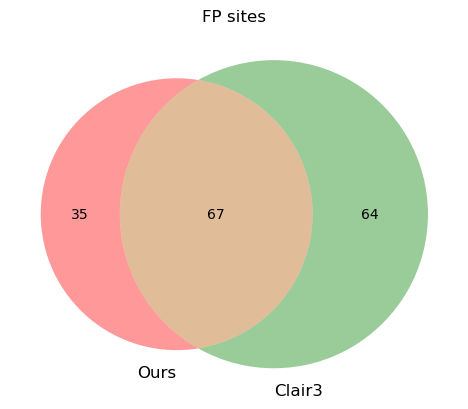

In [84]:
venn2([ours_fp, clair3_fp], set_labels = ('Ours', 'Clair3'));
plt.title("FP sites")
print(ours_fp-clair3_fp)
output_select_vcf(ours_fp-clair3_fp, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/local_hap/ours_fp.vcf")

{'chr19:18913044', 'chr19:37542349', 'chr19:18144549', 'chr19:53142038', 'chr19:4838578', 'chr19:18369799', 'chr19:45090912', 'chr19:1876010', 'chr19:2133466', 'chr19:35936403', 'chr19:39423668', 'chr19:36157332', 'chr19:4655154', 'chr19:39473188', 'chr19:19856092', 'chr19:41017349', 'chr19:35748583', 'chr19:18364156', 'chr19:16523139', 'chr19:53138831', 'chr19:10110339', 'chr19:13972949', 'chr19:55621121', 'chr19:45146995', 'chr19:38307446', 'chr19:4961780', 'chr19:6413144', 'chr19:36819442', 'chr19:13759586', 'chr19:36157372', 'chr19:36991249', 'chr19:18900435', 'chr19:36573148', 'chr19:4961782', 'chr19:43551574', 'chr19:1597303', 'chr19:41018182', 'chr19:57305270', 'chr19:57868524', 'chr19:54432481', 'chr19:18366207', 'chr19:20395179', 'chr19:41017111', 'chr19:53985618', 'chr19:17517928', 'chr19:37183406', 'chr19:1042810', 'chr19:53984846', 'chr19:8513614', 'chr19:10116528', 'chr19:44002969', 'chr19:40705151', 'chr19:3053804', 'chr19:35733804', 'chr19:40013998', 'chr19:39014493', 'c

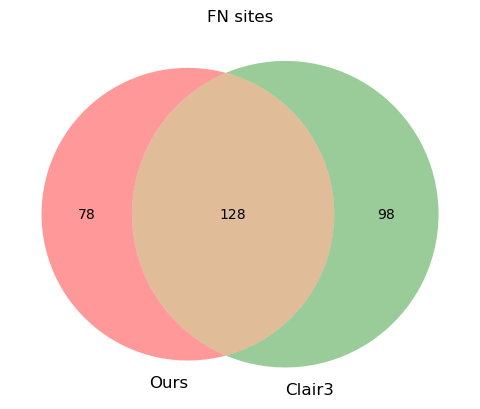

In [85]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
plt.title("FN sites")
print(ours_fn-clair3_fn)
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi/local_hap/ours_fn.vcf")

## HG002-hifi data chromosome 14

In [86]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi/hap/ours_10x.chr14.vcf"
clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi/hap/clair3_10x.chr14.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)

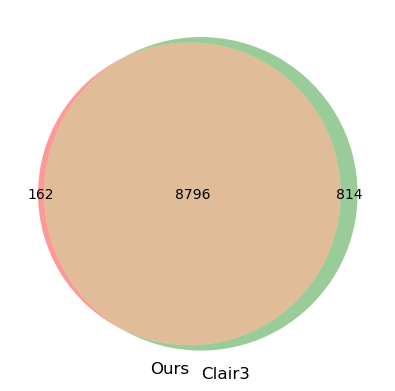

In [16]:
venn2([ours_tp, clair3_tp], set_labels = ('Ours', 'Clair3'));

{'chr14:67259537', 'chr14:50191435', 'chr14:68612598', 'chr14:20324894', 'chr14:89467923', 'chr14:34864098', 'chr14:34790620', 'chr14:20403486', 'chr14:101903288', 'chr14:92529449', 'chr14:31343230', 'chr14:49835156', 'chr14:80558840', 'chr14:63535310', 'chr14:90960913', 'chr14:89795652', 'chr14:55367578', 'chr14:58478119', 'chr14:67008377', 'chr14:54983718', 'chr14:102852724', 'chr14:58322249', 'chr14:31006656', 'chr14:69434466', 'chr14:58435808', 'chr14:39073706', 'chr14:60138006', 'chr14:49831446', 'chr14:63532970', 'chr14:92617310', 'chr14:63895645', 'chr14:31092684', 'chr14:102651721', 'chr14:103579448', 'chr14:39272273', 'chr14:75837944', 'chr14:21460885', 'chr14:34584008', 'chr14:71446096', 'chr14:71714702', 'chr14:71403345', 'chr14:91502326', 'chr14:68612573', 'chr14:30909302', 'chr14:92661559', 'chr14:67985653', 'chr14:105443556', 'chr14:66947776', 'chr14:75653581', 'chr14:89286749', 'chr14:30684199', 'chr14:63895313', 'chr14:93276217', 'chr14:63696885', 'chr14:66517009', 'chr

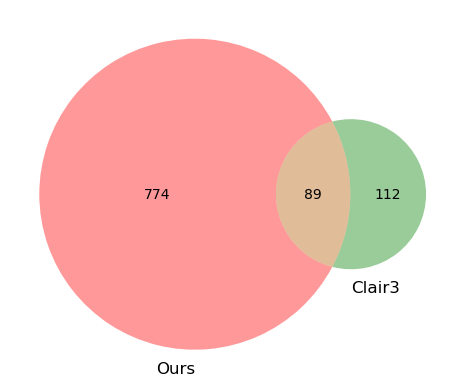

In [17]:
venn2([ours_fp, clair3_fp], set_labels = ('Ours', 'Clair3'));
print(ours_fp-clair3_fp)
output_select_vcf(ours_fp-clair3_fp, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi/hap/ours_fp.vcf")

{'chr14:34864077', 'chr14:67258281', 'chr14:30897509', 'chr14:99451237', 'chr14:105425849', 'chr14:64130625', 'chr14:39643598', 'chr14:53018222', 'chr14:66535584', 'chr14:22777210', 'chr14:70405078', 'chr14:22583472', 'chr14:73397455', 'chr14:52002997', 'chr14:101892967', 'chr14:73427998', 'chr14:24441768', 'chr14:68318182', 'chr14:24474367', 'chr14:20403486', 'chr14:101903288', 'chr14:102162675', 'chr14:24474414', 'chr14:34868698', 'chr14:35028843', 'chr14:66550856', 'chr14:101894408', 'chr14:70985144', 'chr14:80558840', 'chr14:20451508', 'chr14:102865271', 'chr14:50668459', 'chr14:24477038', 'chr14:63876511', 'chr14:31099865', 'chr14:90960913', 'chr14:92664661', 'chr14:75545153', 'chr14:74010633', 'chr14:102220111', 'chr14:73852051', 'chr14:77725256', 'chr14:96530896', 'chr14:61070215', 'chr14:58322249', 'chr14:23074940', 'chr14:31006656', 'chr14:30968972', 'chr14:73783107', 'chr14:20653634', 'chr14:70965455', 'chr14:89575075', 'chr14:22571457', 'chr14:92617310', 'chr14:31092684', 'c

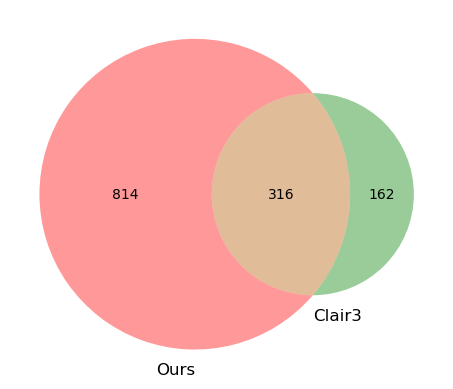

In [18]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
print(ours_fn-clair3_fn)
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi/hap/ours_fn.vcf")

## hg002-hifi data chromosome 14 (local test)

In [33]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi/local_hap/chr14_10x.hap.vcf"
clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi/hap/clair3_10x.chr14.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)

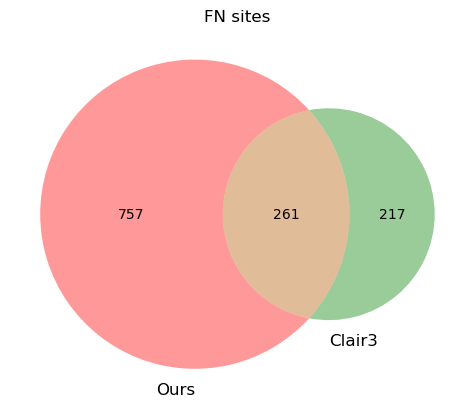

In [34]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
plt.title("FN sites")
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi/local_hap/ours_fn.vcf")

## HG002-hifi data chromosome 20

In [4]:
# ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/strand_chr20_10x.hap.vcf"
# ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/new_truth_chr20_10x.hap.vcf"
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/20-40x/longcallR.20-40x_hap.vcf"
# ours_call = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/strand_hg002_chr20.sort.vcf"
ours_call = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/20-40x/longcallR.hg002.revio.allctgs.ours.sort.vcf"
# clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/clair3_chr20_10x.hap.vcf"
# clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/clair3_new_truth_chr20_10x.hap.vcf"
clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/20-40x/clair3.20-40x_hap.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)

Text(0.5, 1.0, 'TP sites')

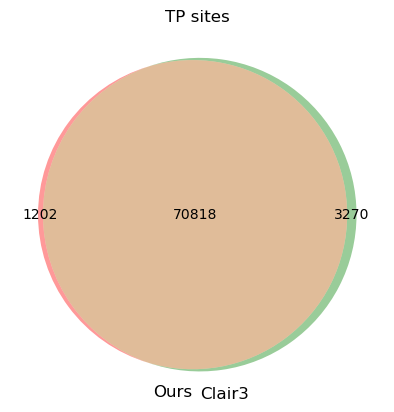

In [5]:
venn2([ours_tp, clair3_tp], set_labels = ('Ours', 'Clair3'));
plt.title("TP sites")

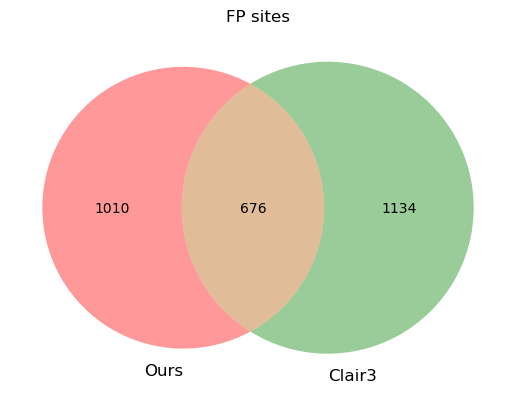

In [8]:
venn2([ours_fp, clair3_fp], set_labels = ('Ours', 'Clair3'));
plt.title("FP sites")
output_select_vcf(ours_fp-clair3_fp, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/20-40x/ours_fp.vcf")

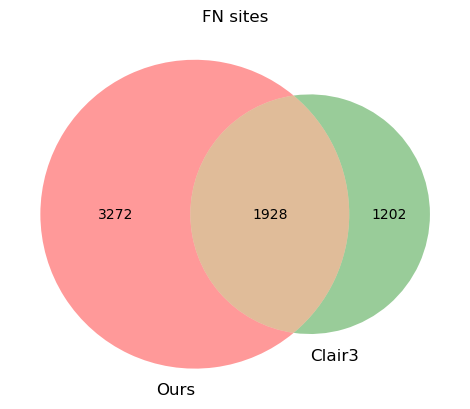

In [9]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
plt.title("FN sites")
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/20-40x/ours_fn.vcf")
output_select_vcf(ours_fn-clair3_fn, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/20-40x/ours_fn_call.vcf")

## HG002-hifi chromosome 20 with annotation

In [42]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/chr20_10x.anno.hap.vcf"
clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/clair3_chr20_10x.anno.hap.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)

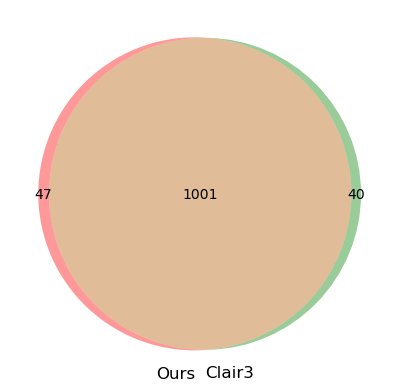

In [43]:
venn2([ours_tp, clair3_tp], set_labels = ('Ours', 'Clair3'));

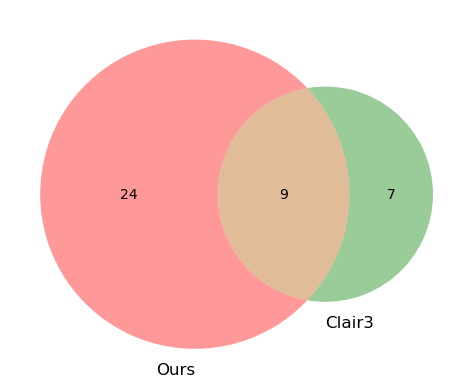

In [44]:
venn2([ours_fp, clair3_fp], set_labels = ('Ours', 'Clair3'));
output_select_vcf(ours_fp-clair3_fp, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/ours_anno_fp.vcf")

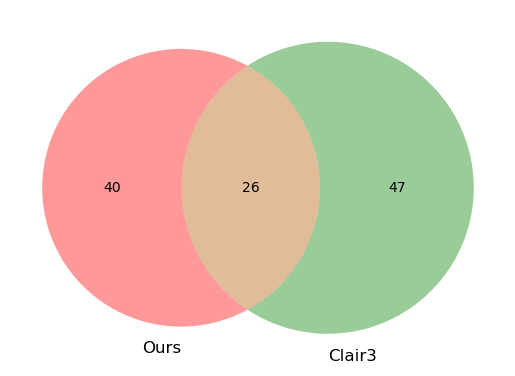

In [45]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg002_hifi_chr20/hap/ours_anno_fn.vcf")

## HG004 chr20 CDS region

In [108]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg004_masseq_annotatopn/hap/ours.20-40x.cds.hap.vcf"
clair3_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg004_masseq_annotatopn/hap/clair3.20-40x.cds.hap.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
fp_fn = ours_fp & ours_fn
ours_fp = ours_fp - fp_fn
ours_fn = ours_fn - fp_fn
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)
fp_fn = clair3_fp & clair3_fn
clair3_fp = clair3_fp - fp_fn
clair3_fn = clair3_fn - fp_fn

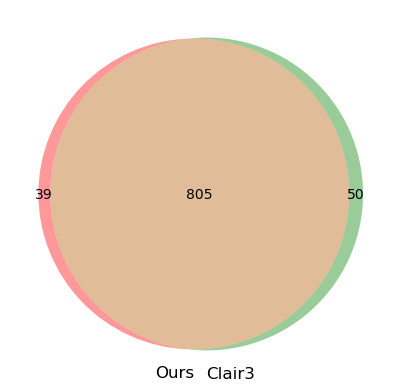

In [109]:
venn2([ours_tp, clair3_tp], set_labels = ('Ours', 'Clair3'));

{'chr17:42536281', 'chr12:11030897', 'chr11:117098370', 'chr17:16735031', 'chr6:32758861', 'chr6:32758926', 'chr1:145403305', 'chr17:16737671', 'chr6:32761797', 'chr6:32761755', 'chr12:11031252', 'chr12:11030603', 'chr6:32758907', 'chr19:12550543', 'chr12:11031321', 'chr6:32758870', 'chr12:101396397', 'chr1:145403317', 'chr19:57885924', 'chr11:65585454', 'chr13:25338733'}


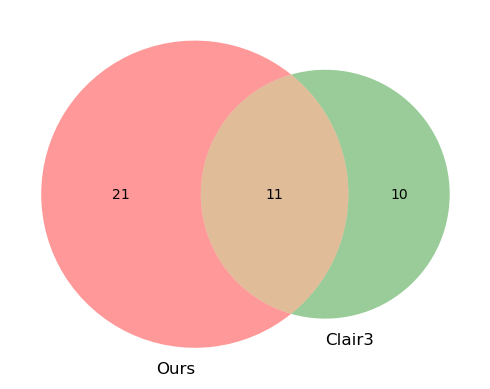

In [110]:
venn2([ours_fp, clair3_fp], set_labels = ('Ours', 'Clair3'));
print(ours_fp-clair3_fp)
output_select_vcf(ours_fp-clair3_fp, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg004_masseq_annotatopn/hap/ours_anno_fp.vcf")

{'chr17:1776708', 'chr17:49312774', 'chr3:175233966', 'chr21:32578758', 'chr6:32759061', 'chr3:126475233', 'chr6:31538914', 'chr14:30956231', 'chr12:11030852', 'chr6:3273223', 'chr1:114625476', 'chr6:158506619', 'chr17:75816828', 'chr15:29252452', 'chr12:8921663', 'chr13:75760757', 'chr8:124553087', 'chr19:731176', 'chr14:50587880', 'chr2:210040470', 'chr12:130821769', 'chr2:127280968', 'chr5:72195135', 'chr11:65882513', 'chr8:73257102', 'chr2:201258272', 'chr19:55592770', 'chr1:153953602', 'chr12:109445569', 'chr7:18727720', 'chr9:137717220', 'chr7:102506799', 'chr8:18084625', 'chr12:11030656', 'chr16:30992848', 'chr6:56540927', 'chr11:558884', 'chr14:52011597', 'chr22:17803576', 'chr11:556521', 'chr12:48494906', 'chr12:42235748', 'chr10:86970555', 'chr4:3428129', 'chr11:8640969', 'chr13:23891578', 'chr9:113297844', 'chr8:66468293', 'chr5:157471682', 'chr2:232340890'}


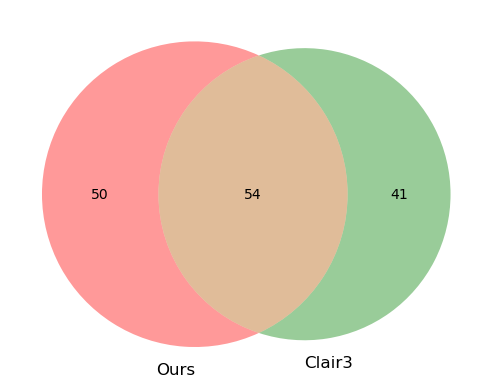

In [111]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
print(ours_fn-clair3_fn)
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hg004_masseq_annotatopn/hap/ours_anno_fn.vcf")

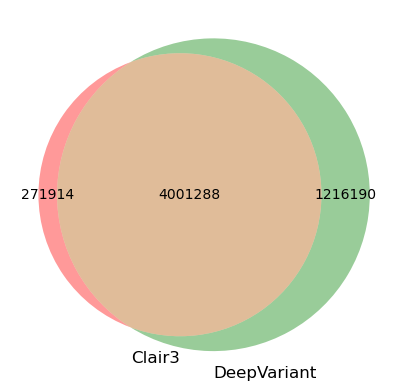

In [10]:
venn2(subsets=(271914, 1216190, 4001288), set_labels=("Clair3", "DeepVariant"))

## Hct116 variant qualities

In [19]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hct116_chr20/hap/20-40x_hap.vcf"
ours_call = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hct116_chr20/longcallR.allctgs.sort.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
fp_fn = ours_fp & ours_fn
ours_fp = ours_fp - fp_fn
ours_fn = ours_fn - fp_fn
output_select_vcf(ours_fn, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hct116_chr20/hap/ours_fn.vcf")
output_select_vcf(ours_tp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hct116_chr20/hap/ours_tp.vcf")
output_select_vcf(ours_fp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hct116_chr20/hap/ours_fp.vcf")

## GM12878 variant qualities

In [20]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/gm12878_drna/hap/20-40x.hap.vcf"
ours_call = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/gm12878_drna/output.sort.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
fp_fn = ours_fp & ours_fn
ours_fp = ours_fp - fp_fn
ours_fn = ours_fn - fp_fn
output_select_vcf(ours_fn, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/gm12878_drna/hap/ours_fn.vcf")
output_select_vcf(ours_tp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/gm12878_drna/hap/ours_tp.vcf")
output_select_vcf(ours_fp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/gm12878_drna/hap/ours_fp.vcf")

## Hek293t variant qualities

In [21]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hek293t_chr20/hap/20-40x_hap.vcf"
ours_call = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hek293t_chr20/longcallR.allctgs.sort.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
fp_fn = ours_fp & ours_fn
ours_fp = ours_fp - fp_fn
ours_fn = ours_fn - fp_fn
output_select_vcf(ours_fn, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hek293t_chr20/hap/ours_fn.vcf")
output_select_vcf(ours_tp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hek293t_chr20/hap/ours_tp.vcf")
output_select_vcf(ours_fp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/hek293t_chr20/hap/ours_fp.vcf")

## Wtc11 variant qualities

In [23]:
ours_hap_file = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_cdna/hap/20-40x_hap.vcf"
ours_call = "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_cdna/wtc11.ont.allctgs.ours.sort.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
fp_fn = ours_fp & ours_fn
ours_fp = ours_fp - fp_fn
ours_fn = ours_fn - fp_fn
output_select_vcf(ours_fn, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_cdna/hap/ours_fn.vcf")
output_select_vcf(ours_tp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_cdna/hap/ours_tp.vcf")
output_select_vcf(ours_fp, ours_call, "/Users/nh661/postdoc/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_cdna/hap/ours_fp.vcf")

In [9]:
ours_hap_file = "/Users/nh661/postdoc/projs/rna_snps/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi_v2/hap/longcallR.10-20x_noAG.hap.chr19.vcf"
ours_call = "/Users/nh661/postdoc/projs/rna_snps/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi_v2/longcallR.wtc11.hifi.allctgs.ours.sort.vcf"
clair3_hap_file = "/Users/nh661/postdoc/projs/rna_snps/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi_v2/hap/clair3.10-20x.hap.chr19.vcf"
(ours_tp, ours_fp, ours_fn) = load_hap(ours_hap_file)
(clair3_tp, clair3_fp, clair3_fn) = load_hap(clair3_hap_file)

Text(0.5, 1.0, 'TP sites')

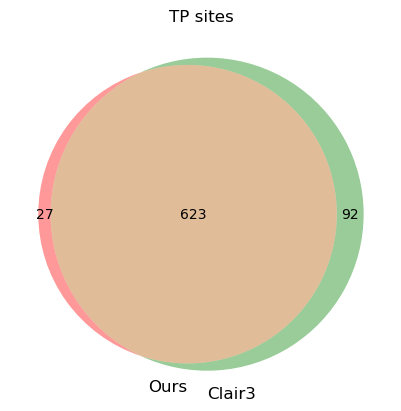

In [6]:
venn2([ours_tp, clair3_tp], set_labels = ('Ours', 'Clair3'));
plt.title("TP sites")

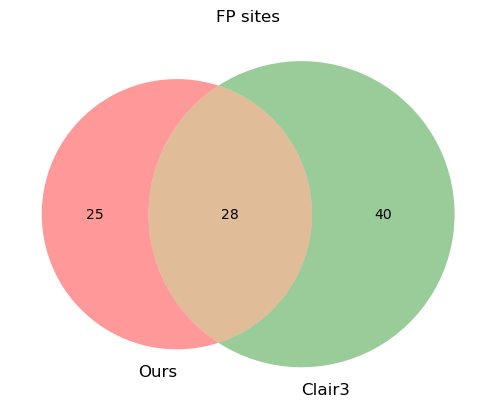

In [14]:
venn2([ours_fp, clair3_fp], set_labels = ('Ours', 'Clair3'));
plt.title("FP sites")
output_select_vcf(ours_fp-clair3_fp, ours_hap_file, "/Users/nh661/postdoc/projs/rna_snps/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi_v2/hap/ours_fp.vcf")
output_select_vcf(ours_fp-clair3_fp, ours_call, "/Users/nh661/postdoc/projs/rna_snps/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi_v2/hap/ours_fp_call.vcf")

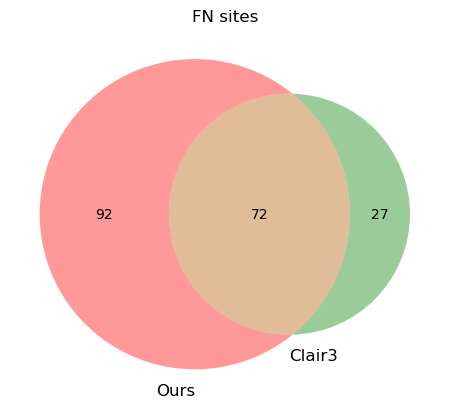

In [11]:
venn2([ours_fn, clair3_fn], set_labels = ('Ours', 'Clair3'));
plt.title("FN sites")
output_select_vcf(ours_fn-clair3_fn, ours_hap_file, "/Users/nh661/postdoc/projs/rna_snps/htslib_rs_release/htslib_rs/debug/ours_clair3/wtc11_hifi_v2/hap/ours_fn.vcf")